# Bitcoin Transaction Network Analysis - Analysis

In [19]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [21]:
extraction_path='extractions/'

# Print extractions
files = os.listdir(extraction_path)
print(files)


['15Tx02-200-blocks-2015_02_01_00_00_00-2017_02_01_11_59_59', '15Tx02-200-blocks-2015_02_01_00_00_00-2015_02_01_00_59_59', '56MvEx-3-blocks-2015_02_01_00_00_00-2015_02_01_00_59_59']


In [24]:

df=pd.read_csv(extraction_path+files[0]+'/'+files[0]+'.csv',index_col=0)
df.head()

,block_height,no_nodes,no_edges,value_transacted,total_density,nodes_self,selfloop_value,old_nodes_in,ratio_oldin_totalin,value_to_old,old_density
0,419842.0,6699.0,13037.0,2.173407e+12,0.000291,1084.0,2.200236e+11,7633.0,0.585443,1.080389e+12,0.000412
1,449541.0,6103.0,26969.0,4.644513e+11,0.000724,433.0,3.746626e+10,21333.0,0.790990,3.251836e+11,0.001113
2,396806.0,6703.0,9526.0,2.852809e+12,0.000212,1028.0,6.458445e+10,4842.0,0.508240,1.322959e+12,0.000229
3,419336.0,310.0,584.0,2.024170e+10,0.006097,114.0,2.067608e+09,402.0,0.687179,1.196119e+10,0.008656
4,394156.0,6428.0,8957.0,2.650544e+12,0.000217,885.0,1.025728e+11,5131.0,0.572784,1.096032e+12,0.000251


In [14]:
# Graphs in extraction
graphs_path=extraction_path+files[0]+'/graphs/'
graph_files = os.listdir(graphs_path)
print (graph_files)

extractions/56MvEx-3-blocks-2015_02_01_00_00_00-2015_02_01_00_59_59/graphs/
['341395.gpickle', '341392.gpickle']


In [27]:
G=nx.read_gpickle(graphs_path+graph_files[0])
nx.info(G)
graph_id=G.graph['graph_id']

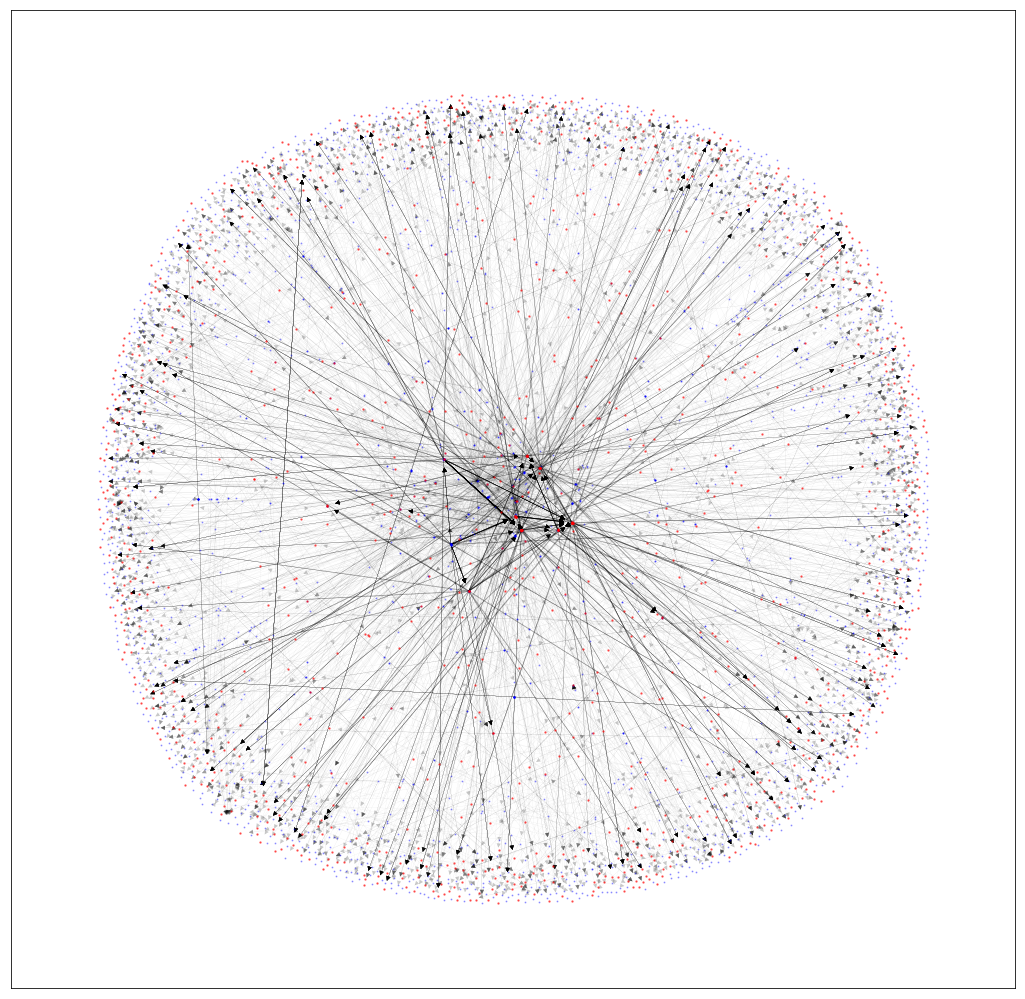

In [32]:
# Graph Visualization

plt.figure(figsize=(18,18))

'''
graph_pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, graph_pos, node_size=1, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos,width=0.1,alpha=0.2)
'''

# extract nodes with specific setting of the attribute
master_nodes = [n for (n,ty) in nx.get_node_attributes(G,'block_created').items() if ty < graph_id]

# and find all the remaining nodes.
other_nodes = list(set(G.nodes()) - set(master_nodes))

# now draw them in subsets  using the `nodelist` arg
#pos_m = nx.spring_layout(master_nodes, center=[,10])
#pos_o =nx.spring_layout(other_nodes, center=[5,5])

nx.draw_networkx_nodes(G, graph_pos, nodelist=master_nodes, node_size=1, node_color='blue', alpha=0.3)
nx.draw_networkx_nodes(G, graph_pos, nodelist=other_nodes, node_size=2, node_color='red', alpha=0.5)
nx.draw_networkx_edges(G, graph_pos,width=0.1,alpha=0.2)



plt.show()

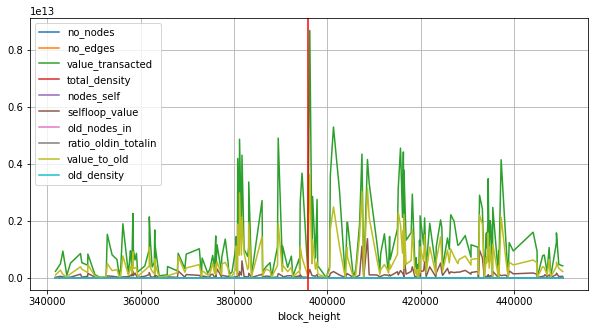

In [46]:
df=df.sort_values('block_height')
df.set_index('block_height').plot(figsize=(10,5), grid=True)
plt.axvline(x=395800,color='red')

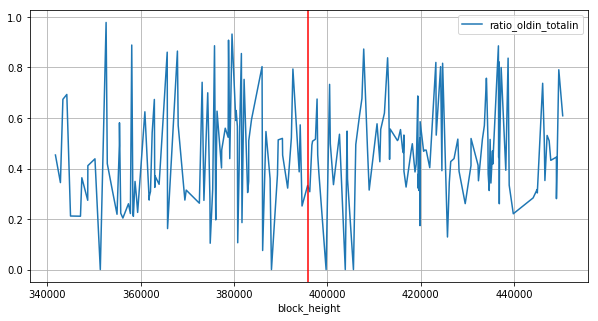

In [45]:
df[['block_height','ratio_oldin_totalin']].set_index('block_height').plot(figsize=(10,5), grid=True)
plt.axvline(x=395800,color='red')

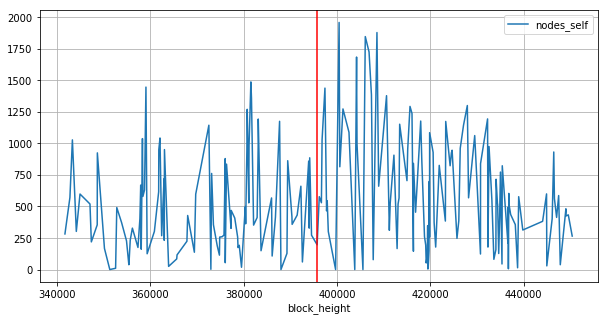

In [47]:
df[['block_height','nodes_self']].set_index('block_height').plot(figsize=(10,5), grid=True)
plt.axvline(x=395800,color='red')

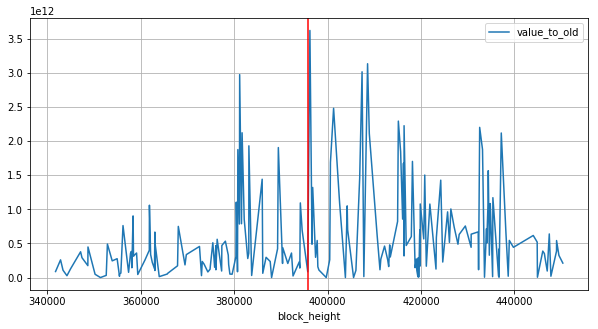

In [48]:
df[['block_height','value_to_old']].set_index('block_height').plot(figsize=(10,5), grid=True)
plt.axvline(x=395800,color='red')